Exercise 1 
Solution: 93P = 50p + 2 * 20p+ 2p+ 1p 
So 5 coins in total

Exercise 2
1. Check if the number is bigger then any of our coins avilable 
2. Take the biggest of the coins that is less than our value 
3. Subtract it as many times we can so that our number still remains a positive value and the amount we manged to subtract it gets added to the total value of coins
4. If the number becomes negative we move down a coin value and see if we can subtract it. If we can we add it to the total number of coins
5. We do step 4 until it becomes 0 and add the amount of coins we subtracted and we get the toal result

In [11]:
def coins_change(coins, amount):
    coins.sort(reverse = True) # Sort the coins in descending order
    coins_count = 0 #Variable to keep track of the total number of coins used
    change = [] # List the coins we used

    for coin in coins: #It counts every coin 
        while amount >= coin: #It checks if coin is grater than the amount that we put
            amount -= coin # We subtract the coin from the intial amount
            coins_count += 1 # Count the coin that we sbustracted
            change.append(coin) # Creates a list of coins used to subtract

    if amount == 0:
        print (f"Minimum number of coins required: {coins_count}")
        print("Coins used:", change)
    else:
        print("Not possible to get the desired change with the coins. ")

coins = [1,2,5,10,20,40,50,100,150,200,250] # List of availble coins
amount = 80 # Amount for which we need to find the minmum number of coins

coins_change(coins, amount)

Minimum number of coins required: 3
Coins used: [50, 20, 10]


Ecercise 6

Would be more efficient if the code will be able to subtract the coin 80 more efficiently, I don't know why it comes up with the answer 50, 20, 10. Even if I added a new 40 coin 
I will be better by adding error handling that verifies if the amount that is given is negative and it outputs a message.


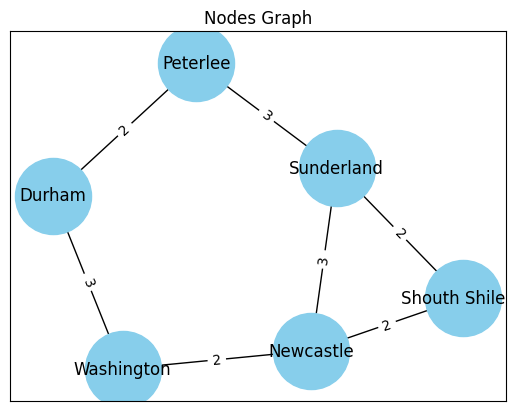

A* path: ['Sunderland', 'Newcastle', 'Washington']


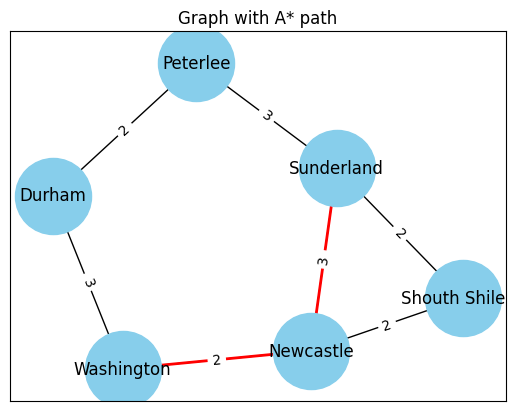

In [5]:
#Exercise 7-8
import heapq
import matplotlib.pyplot as plt
import networkx as nx
# Class representing a node in the graph
class Node:
    def __init__(self, name, heuristic_cost):
        self.name = name
        self.heuristic_cost = heuristic_cost
        self.adjacent = {}
        self.parent = None
        self.g_cost = float("inf")
    def add_neighbor(self, neighbor, cost):
        self.adjacent[neighbor] = cost
    def __lt__(self, other):
        return self.g_cost + self.heuristic_cost < other.g_cost + other.heuristic_cost
# A* search algorithm
def astar_search(start, goal):
    open_list = []
    closed_set = set()
    start.g_cost = 0
    heapq.heappush(open_list, start)
    while open_list:
        current_node = heapq.heappop(open_list)
        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1]
        closed_set.add(current_node)
        for neighbor, cost in current_node.adjacent.items():
            tentative_g_cost = current_node.g_cost + cost
            if neighbor in closed_set and tentative_g_cost >= neighbor.g_cost:
                continue
            if tentative_g_cost < neighbor.g_cost or neighbor not in open_list:
                neighbor.g_cost = tentative_g_cost
                neighbor.parent = current_node
                if neighbor not in open_list:
                    heapq.heappush(open_list, neighbor)
    return None
# Creating nodes
A = Node("Newcastle", 5)
B = Node("Shouth Shileds", 4)
C = Node("Sunderland", 3)
D = Node("Washington", 2)
E = Node("Peterlee", 1)
F = Node("Durham", 0)
# Adding neighbors and their costs
A.add_neighbor(B, 2)
A.add_neighbor(D, 2)
A.add_neighbor(C, 3)
B.add_neighbor(A, 2)
B.add_neighbor(C, 2)
C.add_neighbor(B, 2)
C.add_neighbor(A, 3)
C.add_neighbor(E, 3)
D.add_neighbor(A, 2)
D.add_neighbor(F, 3)
F.add_neighbor(D, 3)
E.add_neighbor(F, 2)
E.add_neighbor(C, 3)
# Visualization without the solution
G = nx.Graph()
edges = [(A.name, B.name, {'weight': 2}), (A.name, C.name, {'weight': 3}), (A.name, D.name, {'weight': 2}),
         (B.name, C.name, {'weight': 2}), (C.name, E.name, {'weight': 3}), (D.name, F.name, {'weight': 3}),
         (E.name, F.name, {'weight': 2})]
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=3000,
node_color='skyblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Nodes Graph')
plt.show()

# Running the A* search algorithm
path = astar_search(C, D)
print("A* path:", path)

# Visualisation with A* path
plt.title('Graph with A* path')
nx.draw_networkx(G, pos, with_labels=True, node_size=3000,
node_color='skyblue')
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)], edge_color='r', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [2]:
pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 325.1 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.7 MB 819.2 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.7 MB 1.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.7 MB 3.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 5.2 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.7 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
